## DTLZ



### DTLZ1

The only difficulty provided by this problem is the convergence to the 
Pareto-optimal hyper-plane.The search space contains $(11^k-1)$ local Pareto-optimal fronts,
where an MOEA can get attracted before reaching the global Pareto-optimal
front.

**Definition**

\begin{equation}
\newcommand{\boldx}{\mathbf{x}}
\begin{array}
\mbox{Minimize} & f_1(\boldx) = \frac{1}{2}x_1x_2\cdots x_{M-1}(1+g(\boldx_M)), \\
\mbox{Minimize} & f_2(\boldx) = \frac{1}{2}x_1x_2\cdots (1-x_{M-1})(1+g(\boldx_M)), \\
\vdots & \vdots \\
\mbox{Minimize} & f_{M-1}(\boldx) = \frac{1}{2}x_1 (1-x_2)(1+g(\boldx_M)), \\
\mbox{Minimize} & f_M(\boldx) = \frac{1}{2}(1-x_1) (1+g(\boldx_M)), \\[2mm]
\mbox{subject to} & 0 \leq x_i \leq 1, \quad \mbox{for $i=1,2,\ldots,n$}.
\end{array}
\end{equation}

The last $k=(n-M+1)$ variables are represented as $\boldx_M$.
The functional $g(\boldx_M)$ requires $|\boldx_M|=k$ variables and must take any function
with $g\geq 0$. 

We suggest the following:
\begin{equation}
g(\boldx_M) = 100\left[|\boldx_M| + \sum_{x_i\in \boldx_M} (x_i-0.5)^2 - \cos(20 \pi (x_i-0.5)) \right]
\end{equation}
 

**Optimum**

The Pareto-optimal solution corresponds to $x_i=0.5$ (for all $x_i\in \boldx_M$) and the objective function values lie on the linear hyper-plane: $\sum_{m=1}^M f_m^{\ast} = 0.5$.

**Plot**

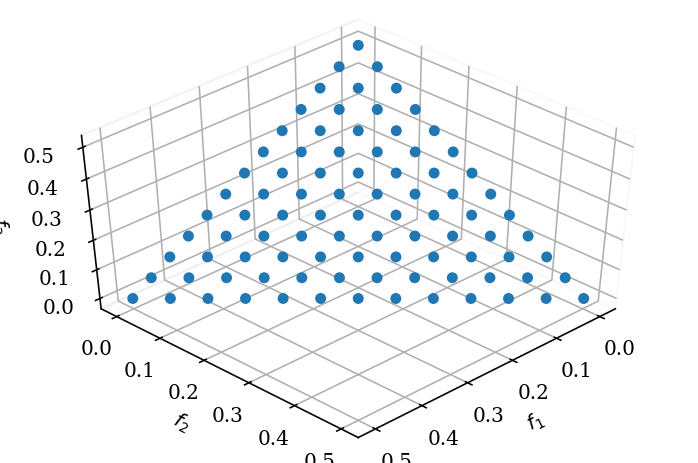

In [1]:
from pymoo.factory import get_problem, get_reference_directions, get_visualization
from pymoo.util.plotting import plot

ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)

pf = get_problem("dtlz1").pareto_front(ref_dirs)
get_visualization("scatter", angle=(45,45)).add(pf).show()

### DTLZ2

This function can also be used to investigate an MOEA's ability to scale up its performance in large number of objectives. Like in DTLZ1, for $M>3$, the Pareto-optimal solutions must lie inside the first octant of the unit sphere in a three-objective plot with $f_M$ as one of the axes. Since all Pareto-optimal solutions require to satisfy $\sum_{m=1}^M f_m^2 = 1$, the difference between the left term with the obtained solutions and one can be used as a metric for convergence as well. Besides the suggestions given in DTLZ1, the problem can be made more difficult by replacing each variable $x_i$ (for $i=1$ to $(M-1)$) with the mean value of $p$ variables: $x_i = \frac{1}{p}\sum_{k=(i-1)p+1}^{ip} x_k$.

**Definition**

\begin{equation}
\begin{array}
\mbox{Min.} & f_1(\boldx) = (1+g(\boldx_M)) \cos (x_1\pi/2) \cdots \cos (x_{M-2}\pi/2) \cos (x_{M-1}\pi/2), \\
\mbox{Min.} & f_2(\boldx) = (1+g(\boldx_M)) \cos (x_1\pi/2) \cdots \cos (x_{M-2}\pi/2) \sin (x_{M-1}\pi/2), \\
\mbox{Min.} & f_3(\boldx) = (1+g(\boldx_M)) \cos (x_1\pi/2) \cdots \sin (x_{M-2}\pi/2), \\
\vdots & \vdots \\
%\mbox{Min.} & f_{M-1}(\boldx) = (1+g(\boldx_M)) \cos (x_1\pi/2) \sin (x_2\pi/2), \\
\mbox{Min.} & f_{M}(\boldx) = (1+g(\boldx_M)) \sin (x_1\pi/2), \\[2mm]
\mbox{with} & g(\boldx_M) = \sum_{x_i \in \boldx_M} (x_i-0.5)^2, \\[2mm]
& 0 \leq x_i \leq 1, \quad \mbox{for $i=1,2,\ldots,n$}.
\end{array}
\end{equation}

Once again, the $\boldx$ vector is constructed with $k=n-M+1$ variables.

**Optimum**

The Pareto-optimal solutions corresponds to $x_i=0.5$ for all $x_i\in \boldx_M$.

**Plot**

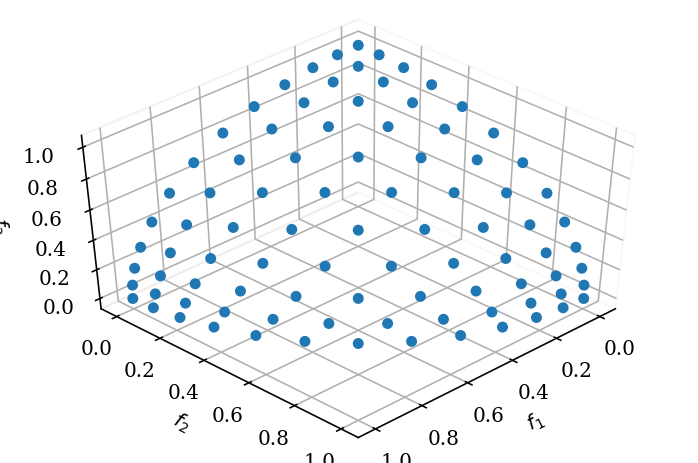

In [22]:
pf = get_problem("dtlz2").pareto_front(ref_dirs)
get_visualization("scatter", angle=(45,45)).add(pf).show()

### DTLZ3

In order to investigate an MOEA's ability to converge to the global Pareto-optimal front, we suggest using the above problem with the $g$ function equal to [Rastrigin](../single/rastrigin.ipynb).
The $g$ function introduces $(3^k-1)$ local Pareto-optimal fronts and one global Pareto-optimal front. All local Pareto-optimal fronts are parallel to the global Pareto-optimal front and an MOEA can get stuck at any of these local Pareto-optimal fronts, before converging to the global Pareto-optimal front (at $g^{\ast}=0$). 


**Definition**

\begin{equation}
\begin{array}
\mbox{Min.} & f_1(\boldx) = (1+g(\boldx_M)) \cos (x_1\pi/2) \cdots \cos (x_{M-2}\pi/2) \cos (x_{M-1}\pi/2), \\
\mbox{Min.} & f_2(\boldx) = (1+g(\boldx_M)) \cos (x_1\pi/2) \cdots \cos (x_{M-2}\pi/2) \sin (x_{M-1}\pi/2), \\
\mbox{Min.} & f_3(\boldx) = (1+g(\boldx_M)) \cos (x_1\pi/2) \cdots \sin (x_{M-2}\pi/2), \\
\vdots & \vdots \\
%\mbox{Minimize} & f_{M-1}(\boldx) = (1+g(\boldx_M)) \cos (x_1\pi/2) \sin (x_2\pi/2), \\
\mbox{Min.} & f_{M}(\boldx) = (1+g(\boldx_M)) \sin (x_1\pi/2), \\
\mbox{with} & g(\boldx_M) = 100\left[|\boldx_M| + \sum_{x_i\in \boldx_M} (x_i-0.5)^2 - \cos(20 \pi (x_i-0.5))\right], \\
& 0 \leq x_i \leq 1, \quad \mbox{for $i=1,2,\ldots,n$}.
\end{array}
\end{equation}

**Optimum**

The global Pareto-optimal front corresponds to $x_i = 0.5$ for $x_i\in \boldx_M$.

**Plot**

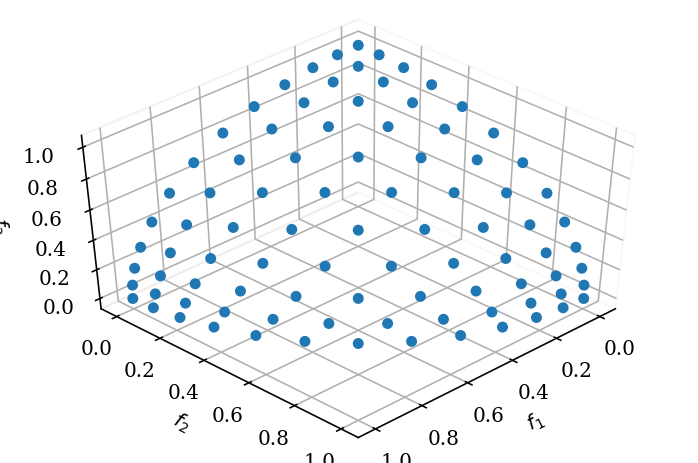

In [15]:
pf = get_problem("dtlz3").pareto_front(ref_dirs)
get_visualization("scatter", angle=(45,45)).add(pf).show()

### DTLZ4

In order to investigate an MOEA's ability to maintain a good distribution of solutions, we modify problem DTLZ2 with a different parametric variable mapping:

**Definition**

\begin{equation}
\begin{array}
\mbox{Min.} & f_1(\boldx) = (1+g(\boldx_M)) \cos (x^{\alpha}_1\pi/2) \cdots \cos (x^{\alpha}_{M-2}\pi/2) \cos (x^{\alpha}_{M-1}\pi/2), \\
\mbox{Min.} & f_2(\boldx) = (1+g(\boldx_M)) \cos (x^{\alpha}_1\pi/2) \cdots \cos (x^{\alpha}_{M-2}\pi/2) \sin (x^{\alpha}_{M-1}\pi/2), \\
\mbox{Min.} & f_3(\boldx) = (1+g(\boldx_M)) \cos (x^{\alpha}_1\pi/2) \cdots \sin (x^{\alpha}_{M-2}\pi/2), \\
\vdots & \vdots \\
%\mbox{Minimize} & f_{M-1}(\boldx) = (1+g(\boldx_M)) \cos (x^{\alpha}_1\pi/2) \sin (x^{\alpha}_2\pi/2), \\
\mbox{Min.} & f_{M}(\boldx) = (1+g(\boldx_M)) \sin (x^{\alpha}_1\pi/2), \\
\mbox{with} & g(\boldx_M) = \sum_{x_i \in \boldx_M} (x_i-0.5)^2, \\[2mm]
& 0 \leq x_i \leq 1, \quad \mbox{for $i=1,2,\ldots,n$}.
\end{array}
\end{equation}

The parameter $\alpha=100$ is suggested here. This modification allows a dense set of solutions to exist near the $f_M$-$f_1$ plane.

**Optimum**

The global Pareto-optimal front corresponds to $x_i = 0.5$ for $x_i\in \boldx_M$.

**Plot**

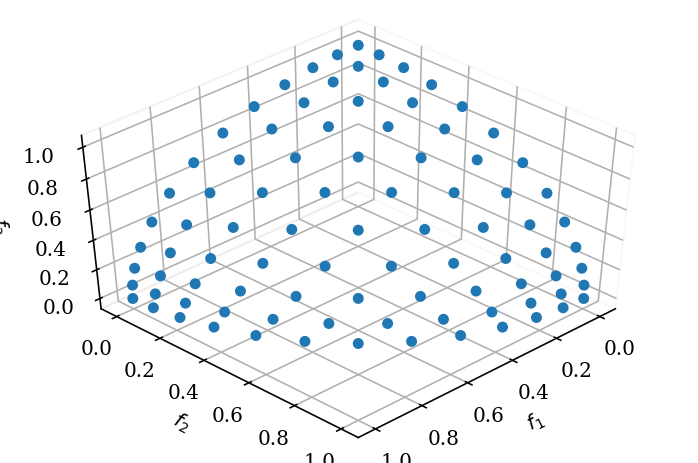

In [23]:
pf = get_problem("dtlz4").pareto_front(ref_dirs)
get_visualization("scatter", angle=(45,45)).add(pf).show()

### DTLZ5

This problem will test an MOEA's ability to converge to a curve and will also allow an easier way to visually demonstrate (just by plotting $f_M$ with any other objective function) the performance of an MOEA. Since there is a natural bias for solutions close to this Pareto-optimal curve, this problem may be easy for an algorithm to solve.

**Definition**

\begin{equation}
\begin{array}
\mbox{Min.} & f_1(\boldx) = (1+g(\boldx_M)) \cos (\theta_1\pi/2) \cdots \cos (\theta_{M-2}\pi/2) \cos (\theta_{M-1}\pi/2), \\
\mbox{Min.} & f_2(\boldx) = (1+g(\boldx_M)) \cos (\theta_1\pi/2) \cdots \cos (\theta_{M-2}\pi/2) \sin (\theta_{M-1}\pi/2), \\
\mbox{Min.} & f_3(\boldx) = (1+g(\boldx_M)) \cos (\theta_1\pi/2) \cdots \sin (\theta_{M-2}\pi/2), \\
\vdots & \vdots \\
%\mbox{Min.} & f_{M-1}(\boldx) = (1+g(\boldx_M)) \cos (\theta_1\pi/2) \sin (\theta_2\pi/2), \\
\mbox{Min.} & f_{M}(\boldx) = (1+g(\boldx_M)) \sin (\theta_1\pi/2), \\
\mbox{with} & \theta_i = \frac{\pi}{4(1+g(\boldx_M))}\left(1+2g(\boldx_M) x_i\right), \quad
\mbox{for $i=2,3,\ldots,(M-1)$}, \\
& g(\boldx_M) = \sum_{x_i \in \boldx_M} (x_i-0.5)^2, \\
& 0 \leq x_i \leq 1, \quad \mbox{for $i=1,2,\ldots,n$}.
\end{array}
\end{equation}

**Optimum**

The Pareto-optimal front corresponds to $x_i=0.5$ for all $x_i\in \boldx_M$ and function values satisfy $\sum_{m=1}^M f_m^2 = 1$.

**Plot**

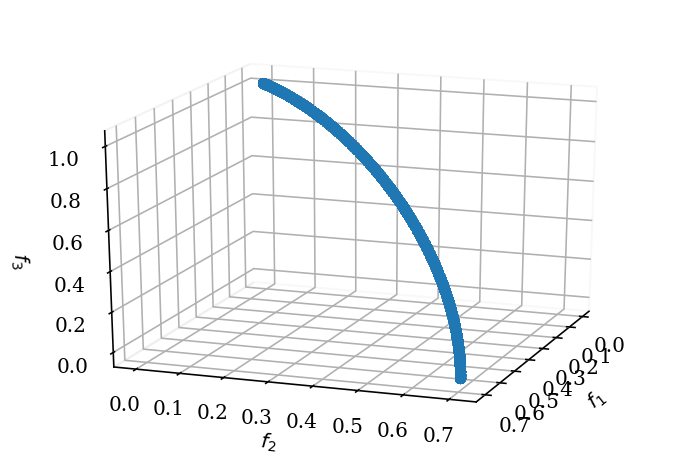

In [3]:
pf = get_problem("dtlz5").pareto_front()
get_visualization("scatter", angle=(20,20)).add(pf).show()

### DTLZ6

The above test problem can be made harder by making a similar modification to the $g$ function in DTLZ5, as done in DTLZ3.

**Definition**

However, in DTLZ6, we use a different $g$ function:

\begin{equation}
g(\boldx_M) = \sum_{x_i\in \boldx_M} x_i^{0.1}.
\end{equation}

The size of $\boldx_M$ vector is chosen as $10$ and the total number of variables is identical as in DTLZ5. The above change in the problem makes NSGA-II and SPEA2 difficult to converge to the true Pareto-optimal front as in DTLZ5. 

**Optimum**

Here, the Pareto-optimal front corresponds to $x_i=0$ for all $x_i\in \boldx_M$.

**Plot**

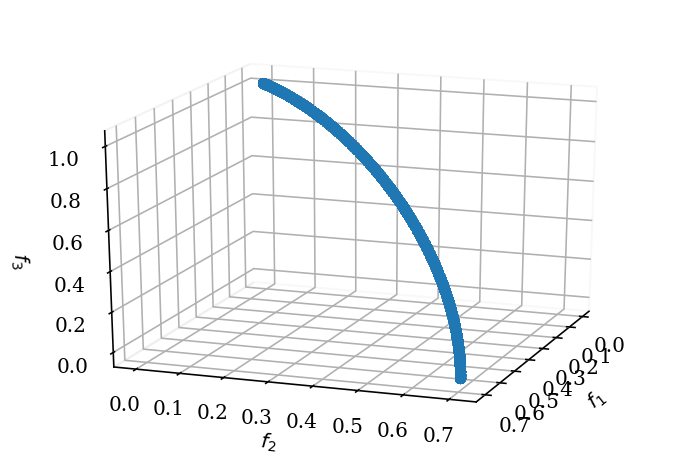

In [5]:
pf = get_problem("dtlz6").pareto_front()
get_visualization("scatter", angle=(20,20)).add(pf).show()

### DTLZ7

This test problem has $2^{M-1}$ disconnected Pareto-optimal regions in the search space. The functional $g$ requires $k=|\boldx_M|=n-M+1$  decision variables. This problem will test an algorithm's ability  to maintain  subpopulation in different Pareto-optimal regions.

**Definition**

\begin{equation}
\begin{array}
\mbox{Minimize} & f_1(\boldx_1)=x_1, \\
\mbox{Minimize} & f_2(\boldx_2)=x_2, \\
\vdots & \vdots \\
\mbox{Minimize} & f_{M-1}(\boldx_{M-1})=x_{M-1}, \\
\mbox{Minimize} & f_M(\boldx) =
(1+g(\boldx_M))h(f_1,f_2,\ldots,f_{M-1},g), \\
\mbox{where} & g(\boldx_M) = 1 + \frac{9}{|\boldx_M|}\sum_{x_i\in \boldx_M} x_i, \\
& h(f_1,f_2,\ldots,f_{M-1},g) = M-\sum_{i=1}^{M-1} \left[ \frac{f_i}{1+g}\left(1 + \sin (3\pi f_i)\right)\right], \\
\mbox{subject to} & 0 \leq x_i \leq 1, \quad \mbox{for $i=1,2,\ldots,n$}.
\end{array}
\end{equation}

**Optimum**

The Pareto-optimal solutions corresponds to $\boldx_M=\vec{0}$.

**Plot**

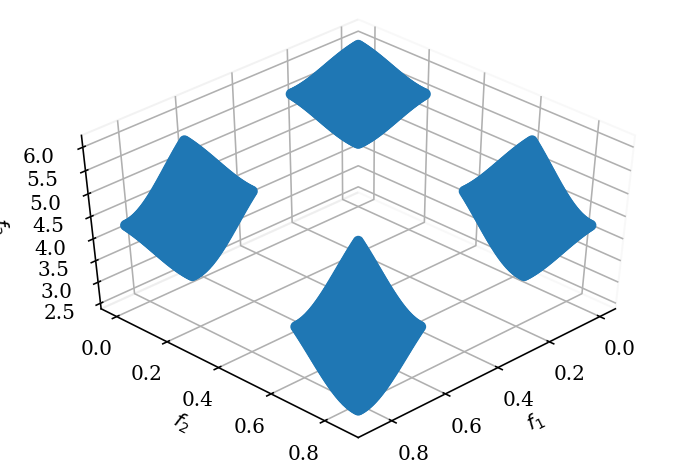

In [2]:
pf = get_problem("dtlz7").pareto_front()
get_visualization("scatter", angle=(45,45)).add(pf).show()